In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import tqdm

In [2]:
data = pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [4]:
min_value = data['Outcome'].value_counts().min()

In [5]:
data = data.groupby('Outcome').apply(lambda x: x.sample(n=min_value, random_state=42)).reset_index(drop=True)


C:\Users\dnyan\AppData\Local\Temp\ipykernel_30356\2417793283.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data = data.groupby('Outcome').apply(lambda x: x.sample(n=min_value, random_state=42)).reset_index(drop=True)


In [6]:
data['Outcome'].value_counts()

Outcome
0    268
1    268
Name: count, dtype: int64

In [7]:
X = data.drop(['Outcome'], axis=1)
y = data['Outcome']

In [8]:
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(X))

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [10]:
scores = []
for k in tqdm.tqdm(range(1, 51)):
    clf = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    scores.append(score)

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 17.01it/s]


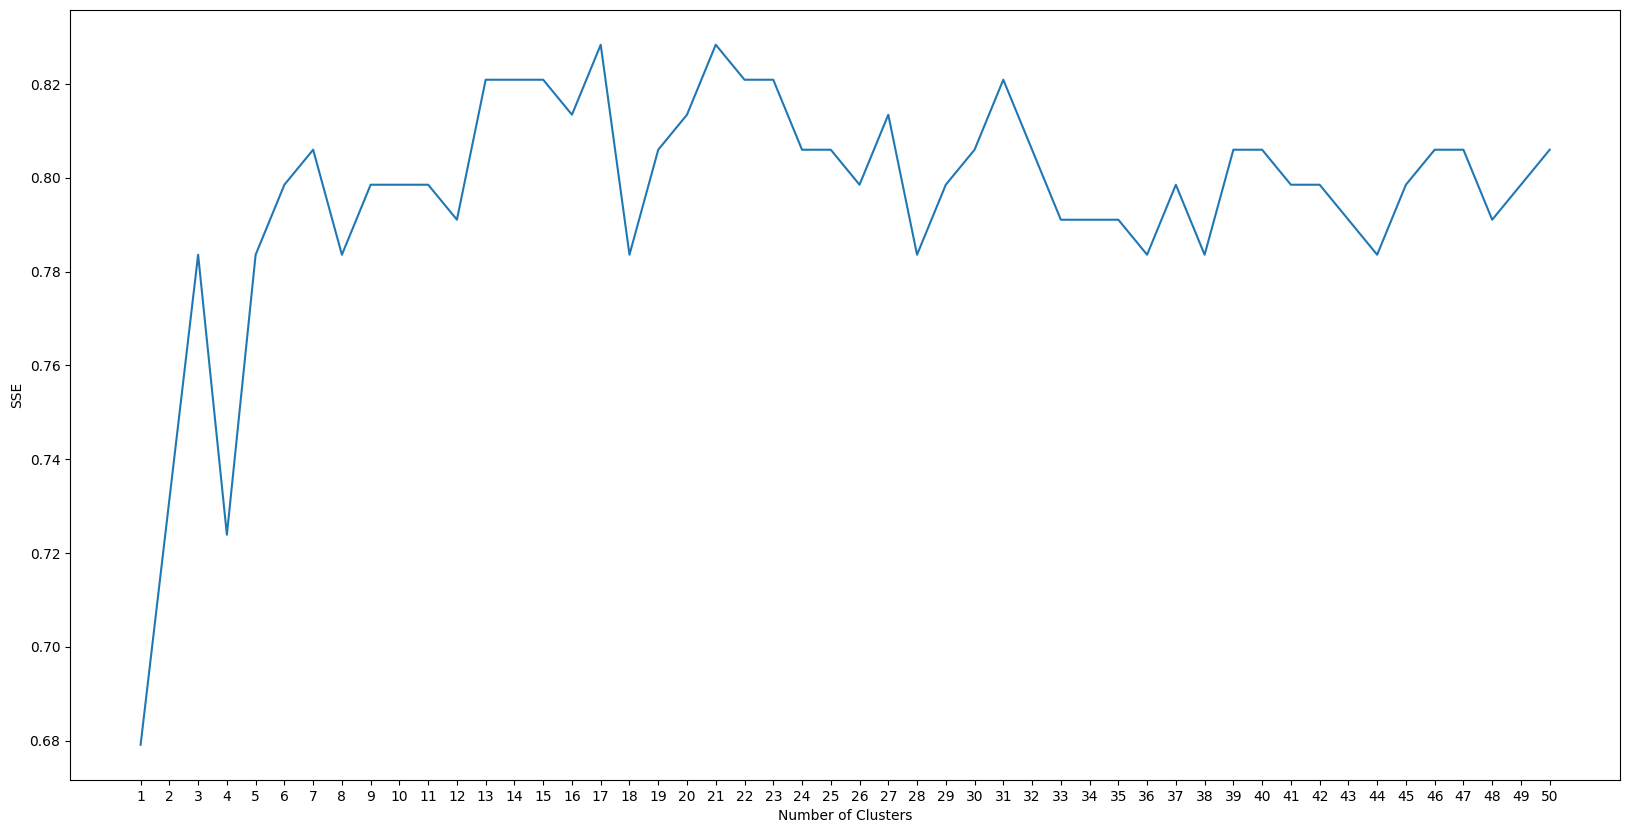

In [11]:
plt.figure(figsize=(20, 10))
plt.plot(range(1, 51), scores)
plt.xticks(range(1, 51))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()


In [12]:
score_max = max(scores)
k_max = scores.index(score_max)

In [13]:
clf = KNeighborsClassifier(n_neighbors=k_max, n_jobs=-1)

In [14]:
clf.fit(X_train, y_train)

,n_neighbors,16
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,-1


In [15]:
clf.score(X_test, y_test)

0.8134328358208955

In [16]:
y_pred = clf.predict(X_test)

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        63
           1       0.82      0.83      0.83        71

    accuracy                           0.81       134
   macro avg       0.81      0.81      0.81       134
weighted avg       0.81      0.81      0.81       134



<Axes: >

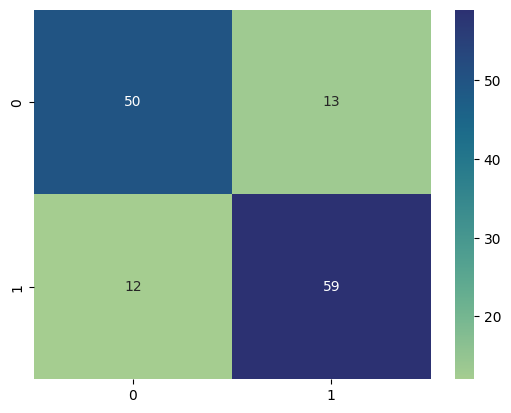

In [18]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='crest')